# Activity 17


---
## Setup
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prxgraddescent_l2(X,y,tau,lam,w_init,it):

## compute it iterations of L2 proximal gradient descent starting at w1
## w_{k+1}= (w_k - tau*X'*(X*w_k - y)/(1+lam*tau)
## step size tau
    W = np.zeros((w_init.shape[0], it+1))
    Z = np.zeros((w_init.shape[0], it+1))
    W[:,[0]] = w_init
    for k in range(it):
        Z[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y);
        W[:,[k+1]] = Z[:,[k+1]]/(1+lam*tau)
        
    return W,Z

In [3]:
## Proximal gradient descent trajectories
## Least Squares Problem
U = np.array([[1, 0], [0, 1], [0, 0], [0, 0]])
S = np.array([[1, 0], [0, 0.5]])
Sinv = np.linalg.inv(S)
V = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
y = np.array([[np.sqrt(2)], [0], [1], [0]])

X = U @ S @ V.T

### Find Least Squares Solution
w_ls = V @ Sinv @ U.T @ y
c = y.T @ y - y.T @ X @ w_ls

### Find values of f(w), the contour plot surface for 
w1 = np.arange(-1,3,.1)
w2 = np.arange(-1,3,.1)
fw = np.zeros((len(w1), len(w2)))
for i in range(len(w2)):
    for j in range(len(w1)):
        w = np.array([ [w1[j]], [w2[i]] ])
        fw[i,j] = (w-w_ls).T @ X.T @ X @ (w-w_ls) + c


---
## Question 3a)
---

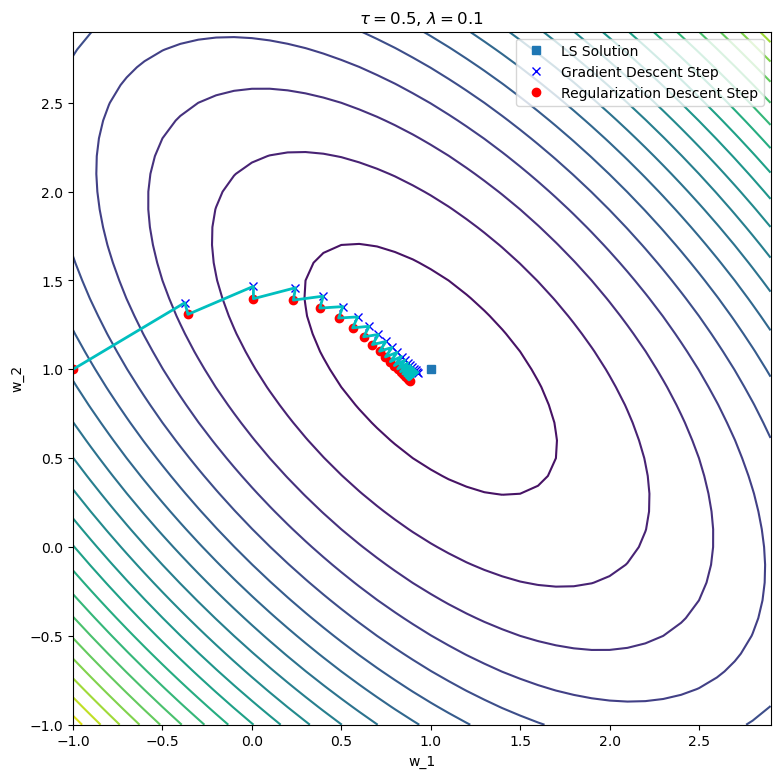

In [8]:

## Find and display weights generated by gradient descent

w_init = np.array([[-1],[1]])
lam = 0.1;
it = 20
tau = 0.5
W,Z = prxgraddescent_l2(X,y,tau,lam,w_init,it)

# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(9,9))
plt.contour(w1,w2,fw,20)
plt.plot(w_ls[0],w_ls[1],"s", label="LS Solution")
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Descent Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

---
## Question 3b)
---